In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

print(diabetes.data.shape, diabetes.target.shape)

print(diabetes.data[0:3])
print(diabetes.target[:3])

x = diabetes.data[:,2]
y = diabetes.target

w = 1.0
b = 1.0


y_hat = x[0] * w + b

print(y_hat)

print(y[0])


# translate weight
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)



(442, 10) (442,)
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]]
[151.  75. 141.]
1.0616962065186886
151.0
1.0678658271705574


In [2]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)

print(w_rate)

0.061696206518688734


In [3]:
# w get increase, y_hat decrease
# negative relation 

w_new = w + w_rate
print(w_new)

1.0616962065186888


In [4]:
# intercept update using rate of change
b_inc = b + 0.1
y_hat_inc = x[0]*w + b_inc
print(y_hat_inc)



1.1616962065186887


In [5]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [6]:
b_new = b + 1
print(b_new)

2.0


In [7]:
# backpropagation update w, b using Diffrence of yhat and y
# 1. Error * transalte
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1*err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [8]:
# 2. get err using x[1] and calculate w, b
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


In [9]:
# adopt to all samples
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1*err
print(w, b)

587.8654539985689 99.40935564531424


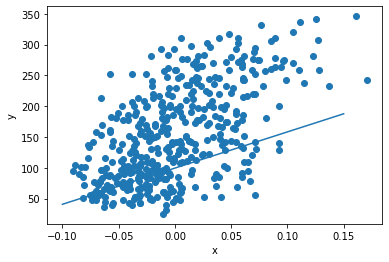

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
pt1 = (-0.1, -0.1*w + b)
pt2 = (0.15, 0.15*w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
# repate several epoch
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i *w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 *err
print(w, b)


913.5973364345905 123.39414383177204


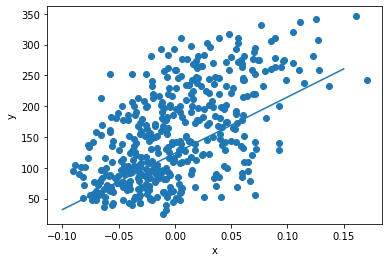

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
pt1 = (-0.1, -0.1*w + b)
pt2 = (0.15, 0.15*w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [13]:
# 6. predication as model
x_new = 0.18
y_pred = x_new * w+b
print(y_pred)

287.8416643899983


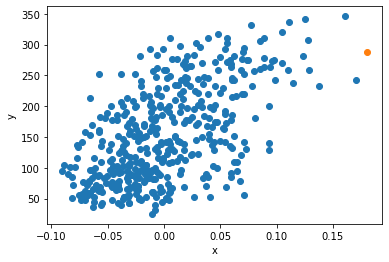

In [14]:
plt.scatter(x,y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
y_hat = x_i * w + b
err = y_i - y_hat
w_rate = x_i
w = w + w_rate * err


In [16]:
err = y_i - y_hat

In [17]:
b = b  + 1 * err

In [18]:
class Neuron:
	def __init__(self):
		self.w = 1.0
		self.b = 1.0
		
	def forpass(self, x):
		y_hat = x * self.w + self.b
		return y_hat
	
	def backprop(self, x, err):
		w_grad = x * err
		b_grad = 1 * err
		return w_grad, b_grad

	def fit(self, x, y, epochs=100):
		for i in range(epochs):
			for x_i, y_i in zip(x, y):
				y_hat = self.forpass(x_i)
				err = -(y_i - y_hat)
				w_grad, b_grad = self.backprop(x_i, err)
				self.w -= w_grad
				self.b -= b_grad


neuron = Neuron()
neuron.fit(x, y)

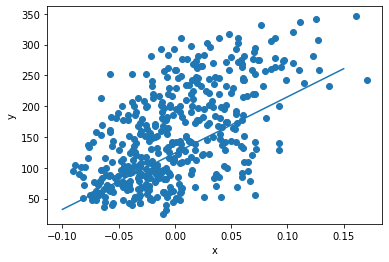

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
pt1 = (-0.1, -0.1*w + b)
pt2 = (0.15, 0.15*w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [20]:
w = 1.0
b = 1.0

y_hat = x[0] *w + b
#predication y_hat
print(y_hat)

1.0616962065186886


In [23]:
#target value
# The reason why the gap between y_hat and y is
# We randomly choose w, b
print(y[0])

151.0


In [24]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [25]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)

#0.0616 is first training's incresing rate of w ... is equal to x[0] The first sample
print(w_rate)

0.061696206518688734


In [26]:
w_new = w + w_rate
print(w_new)

1.0616962065186888


In [27]:
# bias update using rate
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)


1.1616962065186887


In [28]:
b_rate = (y_hat_inc - y_hat ) / (b_inc - b)
print(b_rate)

1.0


In [29]:
b_new = b + 1
print(b_new)

2.0


In [30]:
#backpropagation update w, b using y_hat and y's gap
# err * rate -> update rate
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [31]:
# using second sample x[1], and get new err, w, b
# We know that the w_rate expression is equal to the sample value.
# x[1] == w_rate
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


In [34]:
# w + 4
# b / 2
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


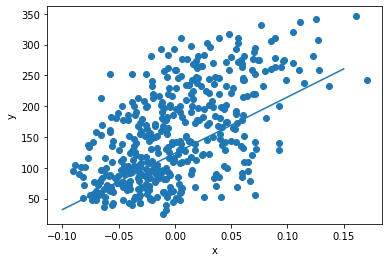

In [35]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
x_new = 0.18
y_pred = x_new